In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
dataset = pd.read_csv('Position_Salaries.csv')

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [21]:
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

x,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]]))

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [23]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', gamma = 'auto')
regressor.fit(x, y)

/Users/joe/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
y_pred = regressor.predict(sc_x.transform([[6.5]]))
sc_y.inverse_transform(y_pred)

array([170370.0204065])

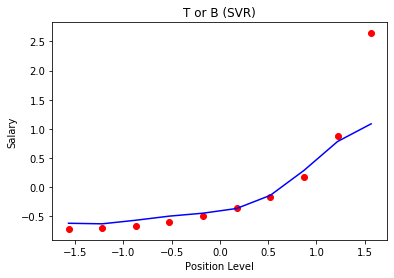

In [27]:
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('T or B (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()